# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

## 1. Preparação dos Dados e Transformação Linear

Primeiro, definimos a matriz de transformação $M$. Para obter a **média** $(\frac{p1+p2}{2})$ e a **diferença** $(p2-p1)$, a matriz deve ser:

$$M = \begin{bmatrix} 0.5 & 0.5 \\ -1 & 1 \end{bmatrix}$$

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Gerando os dados originais
np.random.seed(123)
p1 = np.random.random(50) * 10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# a) Obtenha a média e a diferença através de uma multiplicação matricial
# Definindo a matriz de transformação
M = np.array([[0.5, 0.5], 
              [-1, 1]])

# Aplicando a transformação (Multiplicamos a matriz de dados pela transposta de M ou cada linha por M)
# df.values tem shape (50, 2). O resultado será (50, 2)
dados_transformados = df.values @ M.T

# Criando o novo DataFrame
df_trans = pd.DataFrame(dados_transformados, columns=['média', 'diferença'])

In [7]:
# b) Calcule a correlação entre os dados da p1 e p2
corr_original = df.corr()

# c) Calcule a correlação entre os dados transformados
corr_transformada = df_trans.corr()

print("Correlação Original (p1 vs p2):")
print(corr_original)
print("\nCorrelação Transformada (Média vs Diferença):")
print(corr_transformada)

Correlação Original (p1 vs p2):
          p1        p2
p1  1.000000  0.895737
p2  0.895737  1.000000

Correlação Transformada (Média vs Diferença):
              média  diferença
média      1.000000   0.133474
diferença  0.133474   1.000000


### Análise dos Resultados de Correlação

Ao analisarmos os coeficientes de correlação de Pearson obtidos, podemos tirar conclusões fundamentais sobre a transformação linear aplicada:

#### 1. Correlação Original ($p1$ vs $p2$) = **0.8957**
Os dados originais apresentam uma **forte correlação positiva**. Isso indica uma grande redundância de informação: se um aluno tira uma nota alta na `p1`, as chances de ele tirar uma nota alta na `p2` são altíssimas. Para algoritmos de machine learning, manter variáveis tão correlacionadas pode causar problemas como o aumento da variância dos coeficientes (multicolinearidade).

#### 2. Correlação Transformada (Média vs Diferença) = **0.1334**
Após a transformação matricial, a correlação caiu drasticamente. 
* A **Média** agora representa o "nível global" do aluno.
* A **Diferença** representa a "volatilidade" ou oscilação entre as duas provas.



#### 3. Conclusão Geométrica
A transformação linear que aplicamos ($M$) funciona como uma **rotação dos eixos**. No gráfico original, os pontos estariam concentrados ao longo de uma linha diagonal. Ao transformarmos para média e diferença, estamos essencialmente girando o sistema de coordenadas em aproximadamente 45 graus. 

Essa rotação "alinha" os dados de forma que as novas variáveis (os novos eixos) capturem informações independentes. O fato de a correlação não ser exatamente zero (é 0.13) deve-se ao "ruído" (a variância de `p2` ser ligeiramente diferente da de `p1`), mas a redução de **0.89** para **0.13** mostra quão poderosa é a Álgebra Linear para extrair componentes mais independentes de um dataset.

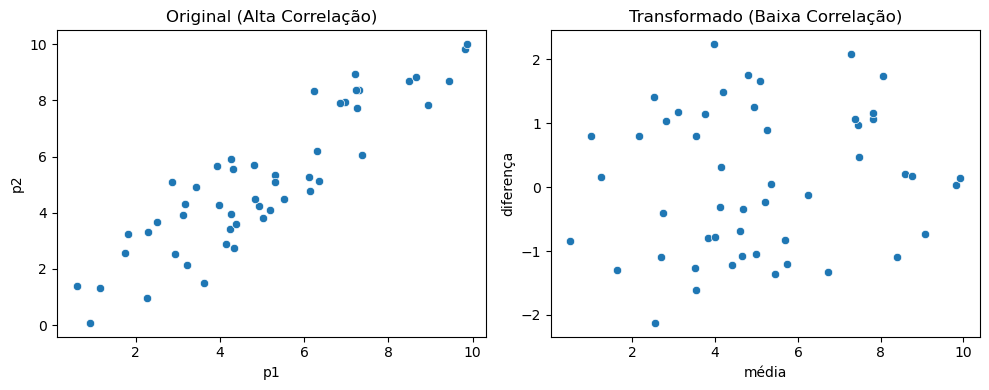

In [10]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='p1', y='p2', data=df)
plt.title('Original (Alta Correlação)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='média', y='diferença', data=df_trans)
plt.title('Transformado (Baixa Correlação)')

plt.tight_layout()
plt.show()

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

# Transformação: Soma e Diferença

Nesta etapa, alteramos a matriz de transformação para observar a **Soma** e a **Diferença** das notas, em vez da média. 

## Definição da Nova Matriz de Transformação

Para obter a Soma ($p1 + p2$) e a Diferença ($p2 - p1$), a matriz $M_2$ deve ser:

$$M_2 = \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}$$

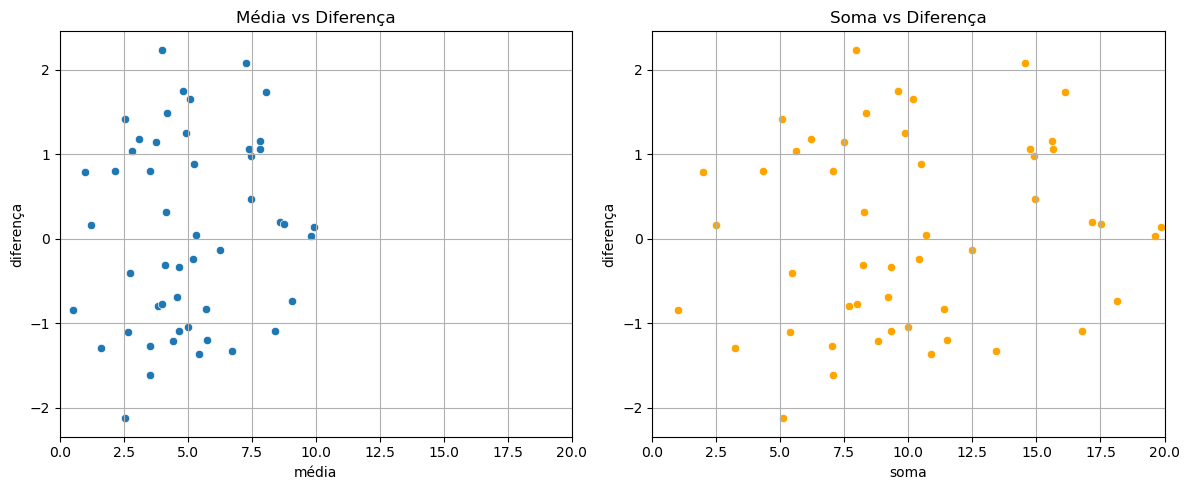

In [15]:
# Definindo a nova matriz de transformação
M2 = np.array([[1, 1], 
               [-1, 1]])

# Aplicando a transformação
dados_soma_dif = df.values @ M2.T

# Criando o DataFrame transformado
df_soma_dif = pd.DataFrame(dados_soma_dif, columns=['soma', 'diferença'])

# Plotando os gráficos para comparação
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Média vs Diferença
sns.scatterplot(x='média', y='diferença', data=df_trans, ax=axes[0])
axes[0].set_title('Média vs Diferença')
axes[0].set_xlim([0, 20]) # Ajuste de escala para comparação
axes[0].grid(True)

# Gráfico 2: Soma vs Diferença
sns.scatterplot(x='soma', y='diferença', data=df_soma_dif, ax=axes[1], color='orange')
axes[1].set_title('Soma vs Diferença')
axes[1].set_xlim([0, 20])
axes[1].grid(True)

plt.tight_layout()
plt.show()

------------